In [1]:
from PyQt5.QtCore import *
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *

import numpy as np
import scipy as sc
import random
from matplotlib.backends.backend_qt5agg import (NavigationToolbar2QT as NavigationToolbar)

import sys
import time
import os

In [2]:
%run "UI/main_window.ipynb"
%run "UI/dialog_topology_config.ipynb"

In [3]:
#%run "BLL/widget_graphics.ipynb"
%run "BLL/network_logic.ipynb"

In [4]:
class MainWindow(QMainWindow, Ui_MainWindow):
    def __init__(self):
        super().__init__()
        self.setup_ui(self, "UI")
        self.setup_actions()
        
        
    def setup_actions(self):
        
        self.action_new.triggered.connect(self.new_project)
        
    def setup_buttons(self):
        self.pushButton_upload_dataset.clicked.connect(self.upload_dataset)
        
        
    def new_project(self):
        
        try:
            project_path, _format = QFileDialog.getSaveFileName(self, 'New project', '/home/earodriguezm/', "NeuNet (.neunet)")
        except:
            QMessageBox.about(self, "Error", "Error en la creación del proyecto")
            return False
        
        self.file_manager = FileManager(project_path)
        
        self.setWindowTitle(self.file_manager.project_name)        
        
        self.create_q_objects(self)
        self.setup_buttons()
        
        
    def upload_dataset(self):

        try:
            dataset_path, _format = QFileDialog.getOpenFileName(self, 'Upload dataset file', self.file_manager.project_path, "CSV (*.csv) ;; TSV (*.tsv)")
        except:
            QMessageBox.about(self, "Error", "Error en la creación del proyecto")
            return False
        
        if _format == "CSV (*.csv)":
            delimiter_format = ','           
        if _format == "TSV (*.tsv)":
            delimiter_format = '\t'
        
        self.file_manager.dataset_path = dataset_path
        self.file_manager.delimiter_format = delimiter_format
        self.show_dataset()
        self.file_manager.count_in_out()
        self.show_nn_topology()
        
    def show_dataset(self):
        _data = self.file_manager.import_dataset(self.file_manager.dataset_path)
        
        _x, _y = _data.shape
        self.tableWidget_dataset.setRowCount(_x)
        self.tableWidget_dataset.setColumnCount(_y)
        
        for i_x in range(0, _x):
            for i_y in range(0, _y):
                self.tableWidget_dataset.setItem(i_x, i_y, QTableWidgetItem(_data[i_x, i_y]))
                
    def show_nn_topology(self):
        self.network = DrawNN( [self.file_manager.n_X, self.file_manager.n_Y], self.widget_topology_diagram)
        self.network.draw()
        
        self.widget_topology_diagram.addWidget(self.netrwork)
        

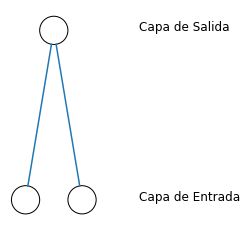

AttributeError: 'QWidget' object has no attribute 'addWidget'

0

In [5]:
app = QApplication(sys.argv)
window = MainWindow()
window.show()
app.exec_()

In [6]:
QFileDialog.getSaveFileName?

Docstring: getSaveFileName(parent: QWidget = None, caption: str = '', directory: str = '', filter: str = '', initialFilter: str = '', options: Union[QFileDialog.Options, QFileDialog.Option] = 0) -> Tuple[str, str]
Type:      builtin_function_or_method
